# Loading geodata tiff file

Here we will inspect visually the geodata that is downloaded by the `bioscann` pipeline via api request, and visualize the different data channels.

Load the required packages:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tifffile import imsave, imread
import json, os, math

Define the target folder:

In [2]:
target_folder = 'data/processed_geodata/alpine/alpine_geodata'

Load the names of the downloaded data channels from the metadata json file:

In [4]:
with open(os.path.join(target_folder,'channel_info.json'), 'r') as file:
    data = json.load(file)
keys = list(data.keys())
print(keys)


['treeheight', 'soil_moisture', 'elevation_gradient', 'max_temp', 'sum_temp', 'ditches', 'peat_depth', 'soil_type', 'biomass', 'leaves_present', 'satellite']


Because of changes on the spatial data api server, we had to load a 3-channel image (instead of single channel) for biomass. We therefore have to add two more biomass channels manually in the list of channel-names:

In [7]:
# Index of 'biomass' in the list
biomass_index = keys.index('biomass')

# Change 'biomass' to 'biomass_1'
keys[biomass_index] = 'biomass_1'

# Add 'biomass_2' and 'biomass_3' after 'biomass_1'
keys.insert(biomass_index + 1, 'biomass_2')
keys.insert(biomass_index + 2, 'biomass_3')

# The updated list is now
print(keys)


['treeheight', 'soil_moisture', 'elevation_gradient', 'max_temp', 'sum_temp', 'ditches', 'peat_depth', 'soil_type', 'biomass_1', 'biomass_2', 'biomass_3', 'leaves_present', 'satellite']


Load the tiff file containing the geodata for one of the training instances:

In [8]:
geodata_file = os.path.join(target_folder,'indata/bboxes_0_0.tiff')
image = imread(geodata_file)
image.shape

(128, 128, 13)

Display the content of the geodata tiff-file:

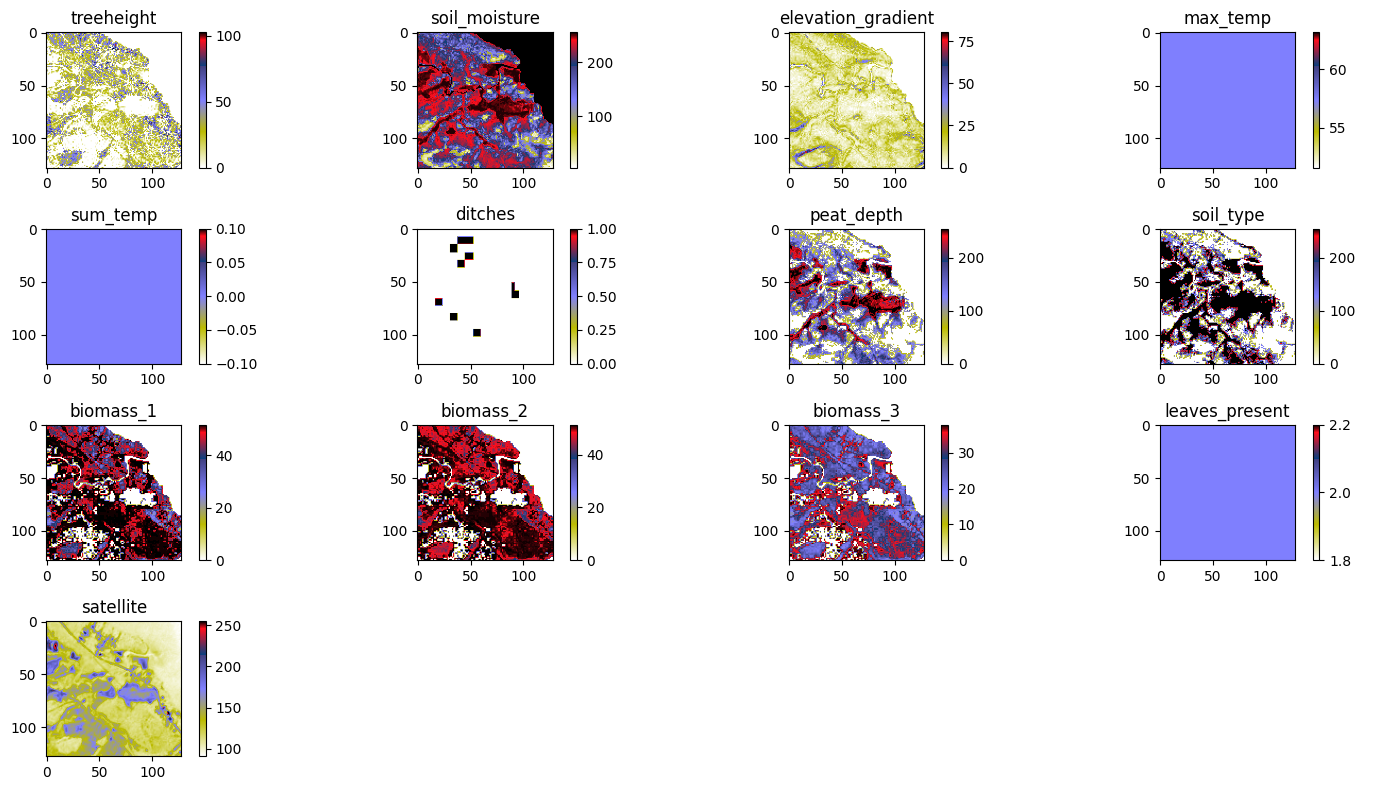

In [9]:
# Calculating the number of rows and columns for the subplots
n_channels = len(keys)
n_cols = int(math.ceil(math.sqrt(n_channels)))
n_rows = int(math.ceil(n_channels / n_cols))

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

# Flatten axes array if necessary
axes = axes.ravel() if n_channels > 1 else [axes]

# Loop through each channel
for i in range(n_channels):
    ax = axes[i]
    im = ax.imshow(image[..., i], cmap='gist_stern_r')  # Change colormap as needed
    fig.colorbar(im, ax=ax)  # Add colorbar for each subplot
    ax.set_title(keys[i])

# Turn off any unused subplots
for j in range(n_channels, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Along with each geodata tiff there is also a mask produced by the `bioscann` pipeline, which shows which pixels of the selected area we have annotated data for (low or high conservation value forest information):

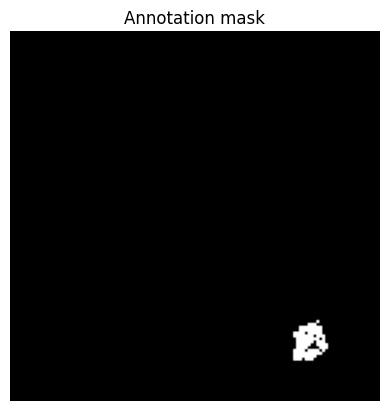

In [28]:
mask_path = geodata_file.replace('.tiff','_mask.tiff')
image = imread(mask_path)
plt.imshow(image, cmap='Greys_r')
plt.title('Annotation mask')
#plt.colorbar()
plt.axis('off')  # To hide axis values
plt.show()